<div style="border: solid green 2px; padding: 20px">

# Исследование компьютерных игр

***Цель исследования*** - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

***Ход исследования:***
- Обзор данных.
- Предобработка данных. Расчеты.
- Исследовательский анализ.
- Формирование портрета пользователя игр для каждого региона - Северная Америка, Европа, Япония.
- Проверка гипотез: 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 2. Средние пользовательские рейтинги жанров Action (экшен-игры) и Sports (спортивные соревнования) разные.
- Общий вывод.

***Входные данные*** - исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).


***Путь к файлу*** - /datasets/games.csv.


***Описание данных:***

* 		Name — название игры
* 		Platform — платформа
* 		Year_of_Release — год выпуска
* 		Genre — жанр игры
* 		NA_sales — продажи в Северной Америке (миллионы проданных копий)
* 		EU_sales — продажи в Европе (миллионы проданных копий)
* 		JP_sales — продажи в Японии (миллионы проданных копий)
* 		Other_sales — продажи в других странах (миллионы проданных копий)
* 		Critic_Score — оценка критиков (максимум 100)
* 		User_Score — оценка пользователей (максимум 10)
* 		Rating — рейтинг от организации ESRB (Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию: - «EC» («Early childhood») — «Для детей младшего возраста». - «E» («Everyone») — «Для всех». - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше». - «T» («Teen») — «Подросткам». - «M» («Mature») — «Для взрослых». - «AO» («Adults Only 18+») — «Только для взрослых». - «RP» («Rating Pending») — «Рейтинг ожидается».
    
</div>

## Обзор данных

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns

Изучим основную информацию о предоставленном датафрейме

In [2]:
try:
    data = pd.read_csv('/Users/svetlana/Yandex.Disk.localized/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Проверим на наличие дубликатов

In [4]:
data.duplicated().sum()

0

***Вывод:***
- всего 16715 записей,
- название столбцов  приведены в смешанном регистре, необходимо привести к нижнему регистру;
- присутствуют некорректные форматы данных. Например, в столбцах  Year_of_Release, Critic_Score;
- есть пропущенные значения в стоблцах - Name, Genre, Year_of_Release, Genre, Critic_Score, User_Score, Raring; в ряде столбцов пропуски составляют значительный объем от общего количества (например, столбцы Critic_Score, User_Score, Raring);
- необходимо также проверить датафрейм на наличие выбросов;
- необходимо рассчитать для каждого региона суммарные продажи и результат оформить в виде отдельного столбца.

## Предобработка данных. Расчеты

Приведем названия столбцов к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Посмотрим, сколько пропущенных значений в датафрейме, и какова доля пропусков (в %) в каждом из столбцов в общем объеме.

Таким образом:
- доля пропусков в столбцах name и genre -  менее 0.5% в каждом
- доля пропусков в столбце year_of_release -  менее 2%
- доля пропусков в столбце critic_score  -  51.3%
- доля пропусков в столбце user_score   -  40.1%
- доля пропусков в столбце rating  -  40.5%

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
data.isna().sum() / data.shape[0] * 100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

Изучим строки с пропусками в столбцах name и genre. Доля пропусков в данных столбцах крайне мала - менее 0.5% в каждом.  Пропуски в данных столбцах представлены в одних и тех же двух строках. Данные строки также не содержат информацию по оценке и рейтингу. Их можно удалить.

In [8]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
data.dropna(subset=['name', 'genre'], inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Проверим столбцы на дубликаты. Дубликатов вариантов жанров в столбце genre нет. Необходимо выяснить, какова природа 5155 дубликата столбца name.

In [11]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

В столбце genre присутствует значение Platform, которое по сути не относится к характеристике жанра игры. Доля строк с данным значением - 5% от общего объема. Оставим так, как есть.

In [12]:
data.query('genre=="Platform"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16355,Strider (2014),PS3,2014.0,Platform,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16357,Goku Makaimura Kai,PSP,2007.0,Platform,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16601,The Land Before Time: Into the Mysterious Beyond,GBA,2006.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
data['name'].duplicated().sum()

5154

In [14]:
data['name'].value_counts()

Need for Speed: Most Wanted    12
Ratatouille                     9
Madden NFL 07                   9
LEGO Marvel Super Heroes        9
FIFA 14                         9
                               ..
Devil's Third                   1
San-X: Chara Sagashi Land       1
TrackMania DS                   1
Gravitar                        1
Glory Days 2                    1
Name: name, Length: 11559, dtype: int64

Возьмем для примера игру, которая встречаетсмя 12 раз в датафрейме - Need for Speed: Most Wanted. Мы видим, что дубли в наименовании обоснованы тем, что представляют разные реализации одной игры для разных платформ с разным годом релиза.

In [15]:
data.query('name=="Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Изучим значения в столбце year_of_release. Доля пропусков незначительна - менее 2% от общего объема. Удалим строки с пропусками

In [16]:
data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [17]:
data.dropna(subset=['year_of_release'], inplace=True)
data['year_of_release'] = data['year_of_release'].astype('int32')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


***Проанализируем данные в столбце critic_score.*** Доля пропущенных значений велика  - 51.3% от общего объема.

Мы видим, что позиции, имеющие пропуски в столбце critic_score также содержат пропуски в столбцах с пользовательской оценкой и рейтингом. Вероятнее всего пропуски относятся к играм, релиз которых пришелся на ранние 90-е годы, когда компьютерные игры на ПК только начали активно развиваться с повсеместным распространением ПК, и основная часть приходилась на игры на приставках и соответственно еще не были распространены рейтинги и оценки игр как со стороны экспертов, так и со стороны пользоваталей. Также пропуски относятся к позициям игр, которые имеют нулевые или очень маленькие продажи, и в связи с этим не были удостоены оценок со стороны экспертов.

In [18]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Заменим пропуски в critic_score на значение -100, которое не входит в интервал реальных пользовательских оценок

In [19]:
data['critic_score'] = data['critic_score'].fillna(-100).astype('int32')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(4), int32(2), object(5)
memory usage: 1.4+ MB


***Проанализируем данные в столбце user_score.*** Доля пропущенных значений значительна - 40.1% от общего объема. Предополжения наличия данных пропусков аналогична оценкам экспертов. Данные пропуски относятся к играм, релиз которых пришелся на ранние 90-е годы, когда компьютерные игры на ПК только начали активно развиваться с повсеместным распространением ПК, и основная часть приходилась на игры на приставках и соответственно еще не были распространены рейтинги и оценки игр пользоваталями. Также пропуски относятся к позициям игр, которые имеют нулевые или очень маленькие продажи, и в связи с этим не были удостоены оценок со стороны пользователей.

In [20]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-100,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-100,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-100,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-100,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-100,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-100,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-100,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-100,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-100,NaN,NaN


Рассмотрим уникальные значения в столбце user_score. Как мы можем видеть, помимо пропусков присутствует значение tbd, что в контексте нашего проекта скорее всего расшифровывается как to be determined (будет определено). Часто данная абрревиатура используется для обозначения неизвестой информации (в компьютерных играх, например, она используется, когда точно неизвестна дата релиза). В нашем случае tbd скорее всего может интерпретироваться как отсутствие оценок пользователей или настолько их малое количество, которое не позволяет сформировать объективную общую оценку.

In [21]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Заменим tbd в столбце user_score на nan. Менять на среднюю/медиану не будем, чтобы не искажать результаты дальнейшего анализа. Приведем данные столбца user_score к вещественному формату (float)

In [22]:
data['user_score'] = data['user_score'].replace('tbd', np.nan).astype(float)
data['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

Проанализируем данные в столбце rating. Доля пропущенных значений значительна - 40.5% от общего объема. Rating — рейтинг от организации ESRB (Entertainment Software Rating Board), которая была основана в 1994 году.

Ознакомимся с уникальными значениями столбца rating

In [23]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Возможные причины отсутствия рейтинга у игр:
- игры, релиз которых пришелся на период до 1994 года - года основания организации ESRB. Соответственно, далеко не всем играм, выпущенным до этого года, присуждался рейтинг,
- игры, имеющие нулевые продажи или маленькие продажи, издатели которых не сочли необходимым отправлять игру на определение рейтинга,
- ESRB занимается присвоением рейтинга у игр в США и Канаде. В нашем датафрейме содержатся также данные и по другим регионам.

In [24]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-100,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-100,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-100,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-100,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-100,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-100,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-100,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-100,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-100,NaN,NaN


С учетом наших предположений выше заменим пропуски в столбце rating на значение "no rating"

In [25]:
data['rating'] = data['rating'].replace(np.nan, 'no rating')
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'no rating'],
      dtype=object)

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец total_sales

In [26]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-100,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-100,NaN,no rating,31.38


Финально проверим, все ли необходимые корректировки мы внесли

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.5+ MB


***Вывод:***
- мы привели названия столбцов к нижнему регистру,
- определили долю пропущенных значений в соответствующих столбцах в общем объеме,
- в столбцах name и genre удалили две строки с пропущенными значениями,
- в столбце year_of_release удалили пропуски (менее 2%), так как информация по играм без года выпуска нам впоследствии в анализе будет не вполне применима,
- в столбце critic_score заменили пропуски на значени -100 и привели к целочисленному типу (int),
- в столбце user_score заменили tbd на nan и привели к вещественному формату (float),
- в столбце rating заменили пропущенные значения на no rating,
- рассчитали и добавили в таблицу столбец с суммарными продажами во всех регионах.

## Исследовательский анализ

***Проанализируем, сколько игр выпускалось в разные годы.*** Определим, какой период оптимален для дальнейшего анализа

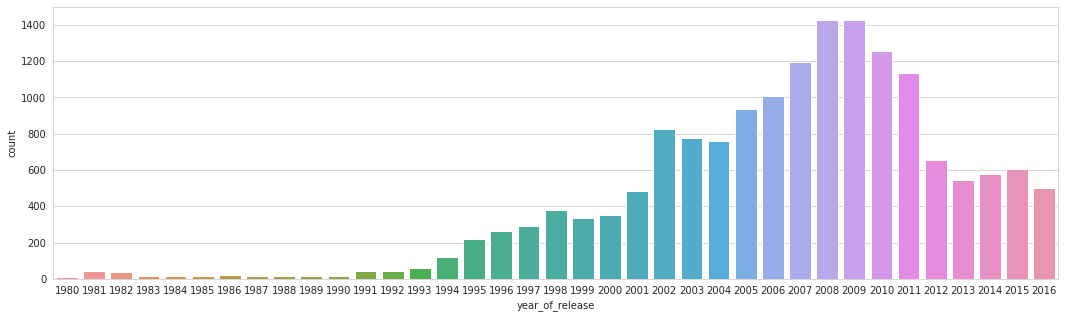

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.countplot(data = data, x='year_of_release');

In [29]:
games_per_year = (
    data.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .reset_index()
)
display(games_per_year)

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


***Вывод:***

С 1990 года происходил постоянный рост количества выпущенных игр, что скорее всего связано с широким распространением и развитием ПК. Наибольшее количество игр выпускалось в 2008 - 2009 гг. С 2010 года наблюдается спад в релизе игр.

***Посмотрим, как менялись продажи по платформам.*** Определим платформы с наибольшими суммарными продажами и построим распределение по годам. Выявим, за какой характерный срок появляются новые и исчезают старые платформы.

In [30]:
total_sales_by_platform = (
    data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)
display(total_sales_by_platform)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


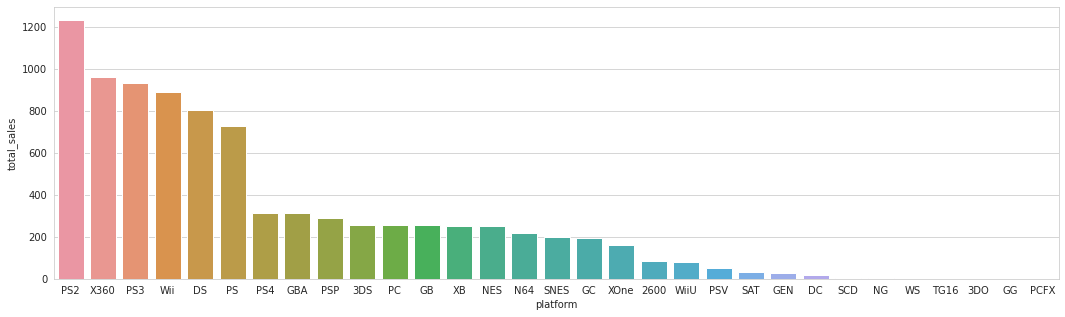

In [31]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.barplot(x=total_sales_by_platform.index,y=total_sales_by_platform['total_sales']);

Построим распределение по годам для Топ-5 платформ. Для этого создадим соответствующий список платформ

In [32]:
top_list_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

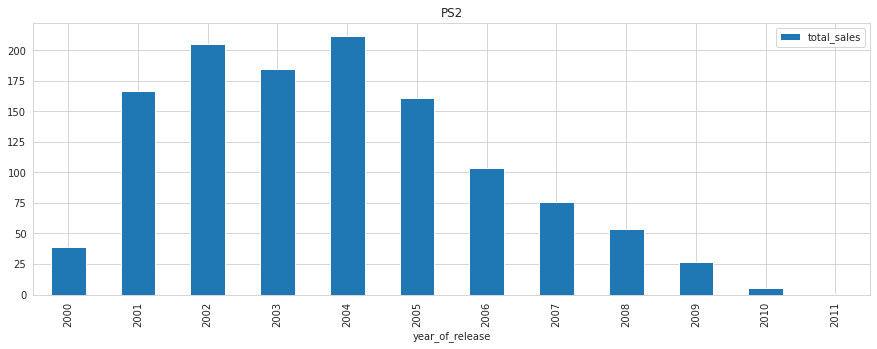

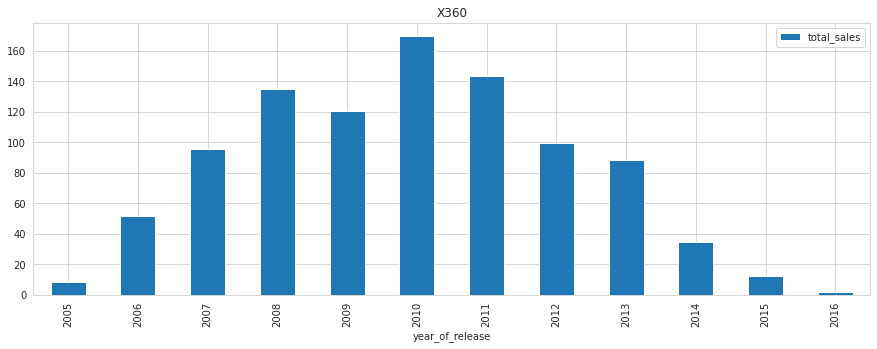

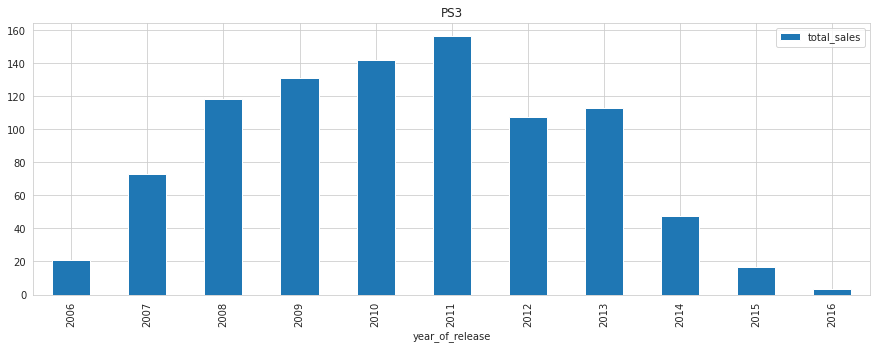

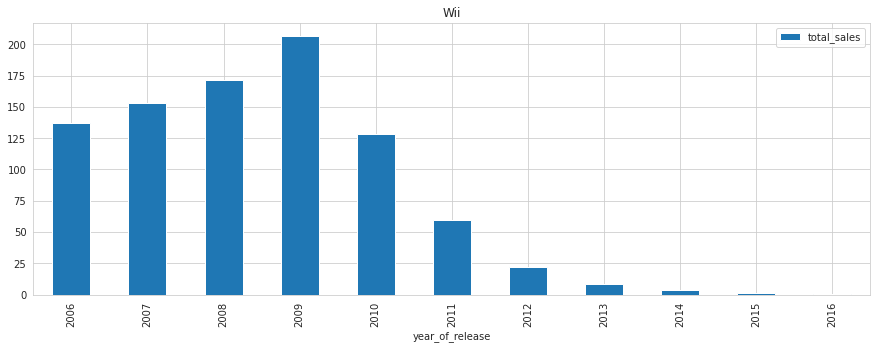

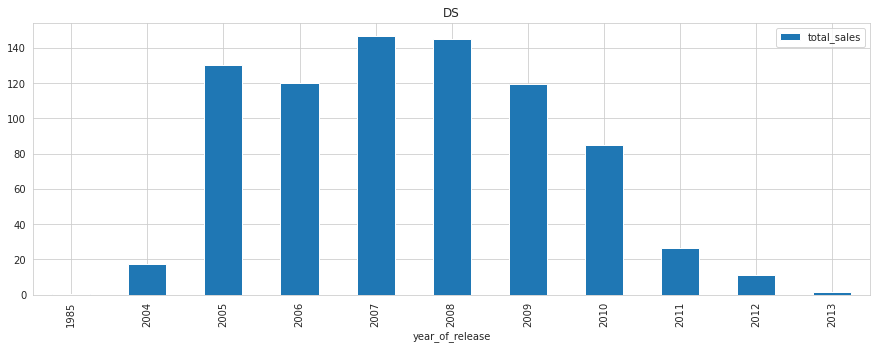

In [33]:
for platform in top_list_platforms:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,5))
    plt.title(platform);

***Вывод:***
- Топ-5 платформ с наибольшими суммарными продажами - PS2, X360, PS3, Wii, DS,
- средняя продолжительность "жизни" платформ - 7-8 лет,
- на пик продаж платформы выходят в среднем через 4-5 лет после релиза,
- к 2016 году платформы из Топ-5 по суммарным продажам потеряли свои позиции.

***Посчитаем, как часто появляются новые платформы.*** В среднем появляется по одной новой платформе ежегодно.

In [34]:
display('Среднее количество новых платформ в год:', len(data['platform']) / len(data['year_of_release']))

'Среднее количество новых платформ в год:'

1.0

***Определим актуальный период для дальнейшего исследования.*** В связи с тем, что средний срок "жизни" платформ 7-8 лет, а также мы имеем три  основных этапа развития - рост продаж до 2008 года, пик продаж приходится на 2008-2009 гг. и дальнейший спад, в качестве релевантного временного промежутка мы можем взять период с 2013 по 2016 гг. Таким образом мы в скоупе будем иметь и платформы, которые сейчас находятся на пике продаж, а также те, которые еще не завершили свой жизенный цикл, и новые платформы последнего года. 

In [35]:
data_actual =  data.query('year_of_release > 2012')

In [36]:
total_sales_by_platform = (
    data_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)
display(total_sales_by_platform)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


In [37]:
data_actual.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,1192.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,-23.656516,6.584564,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,85.912380,1.610413,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,5.800000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,-100.000000,7.000000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,72.000000,7.800000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


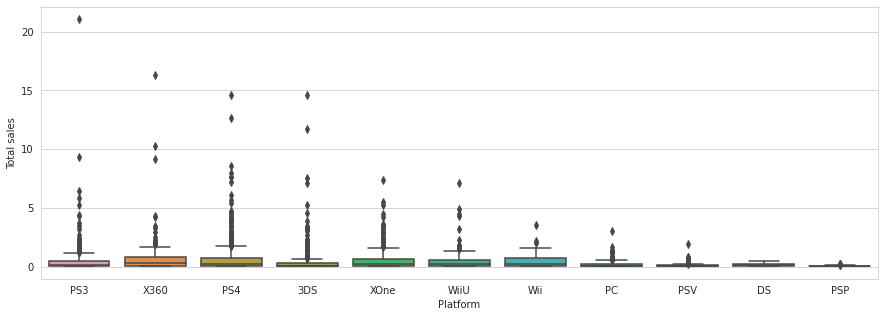

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data_actual, x='platform', y='total_sales')
plt.xlabel('Platform')
plt.ylabel('Total sales');

***Избавимся от выбросов в столбце total_sales*** - значений, выходящих за пределы Q1-1.5 межквартильный размах и Q3+1.5 межквартильный размах

In [39]:
q1 = data_actual['total_sales'].quantile(0.25)
q3 = data_actual['total_sales'].quantile(0.75)
iqr = q3 - q1
data_actual_pure = (
    data_actual.loc[(data_actual['total_sales'] < q3 + 1.5*iqr)
    & (data_actual['total_sales']  > q1 - 1.5*iqr)]
)
data_actual_pure.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,974.000000,1966.000000
mean,2014.525941,0.064568,0.060712,0.037625,0.017365,-31.284842,6.577002,0.180270
std,1.090364,0.109692,0.096397,0.076552,0.028408,83.823450,1.625442,0.216298
min,2013.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,5.800000,0.030000
50%,2015.000000,0.010000,0.020000,0.010000,0.010000,-100.000000,7.000000,0.090000
75%,2015.000000,0.090000,0.080000,0.040000,0.020000,69.000000,7.800000,0.240000
max,2016.000000,0.790000,0.660000,0.870000,0.170000,95.000000,9.300000,0.950000


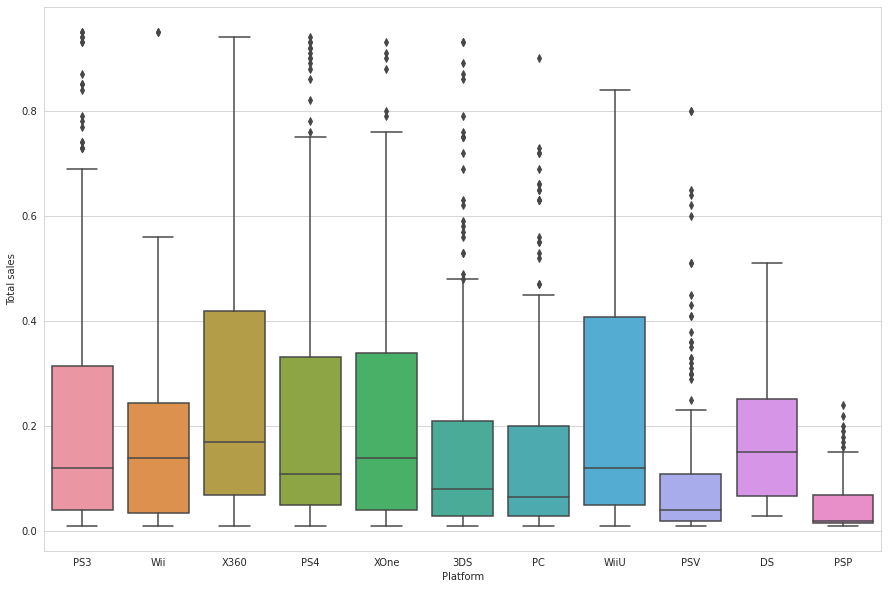

In [40]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data_actual_pure, x='platform', y='total_sales')
plt.xlabel('Platform')
plt.ylabel('Total sales');

***Определим, какие платформы лидируют по продажам, растут или падают.*** Выберем несколько потенциально прибыльных платформ.

Посмотрим на тренд продаж игр за выбранный актуальный период - 2013-2016 гг. Помним, что данные за 2016 год неполные.

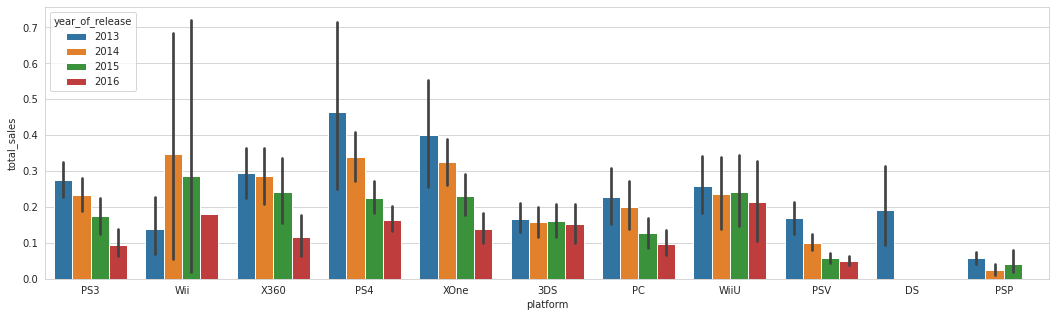

In [41]:
plt.figure(figsize=(18, 5))
sns.barplot(y='total_sales', x='platform', hue='year_of_release', data = data_actual_pure);

***Вывод:***
- потенциально прибыльные платформы  - PS4, 3DS, XOne, WiiU, PC,
- последние несколько лет мы можем наблюдать общий тренд в компьютерных играх - падение продаж.

***Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.*** Проанализируем данные на графике.

Составим датафрейм из топ-5 платформ по суммарным продажам за последние несколько лет 2013-2016 гг.

In [42]:
top_5_platforms = ['PS4','XOne', 'WiiU','3DS', 'PC']
games_top_5_platforms = data_actual_pure[data_actual_pure['platform'].isin(top_5_platforms)]
games_top_5_platforms['total_sales'].describe()

count    1063.000000
mean        0.196820
std         0.222204
min         0.010000
25%         0.040000
50%         0.100000
75%         0.280000
max         0.940000
Name: total_sales, dtype: float64

In [43]:
games_top_5_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,275.0,0.160364,0.194602,0.01,0.03,0.080,0.2100,0.93
PC,182.0,0.155440,0.193572,0.01,0.03,0.065,0.2000,0.90
PS4,312.0,0.219808,0.239878,0.01,0.05,0.110,0.3325,0.94
WiiU,98.0,0.243163,0.240234,0.01,0.05,0.120,0.4075,0.84
XOne,196.0,0.226633,0.232681,0.01,0.04,0.140,0.3400,0.93


Строим график "ящик с усами" по глобальным продажам в разрезе топ-5 платформ

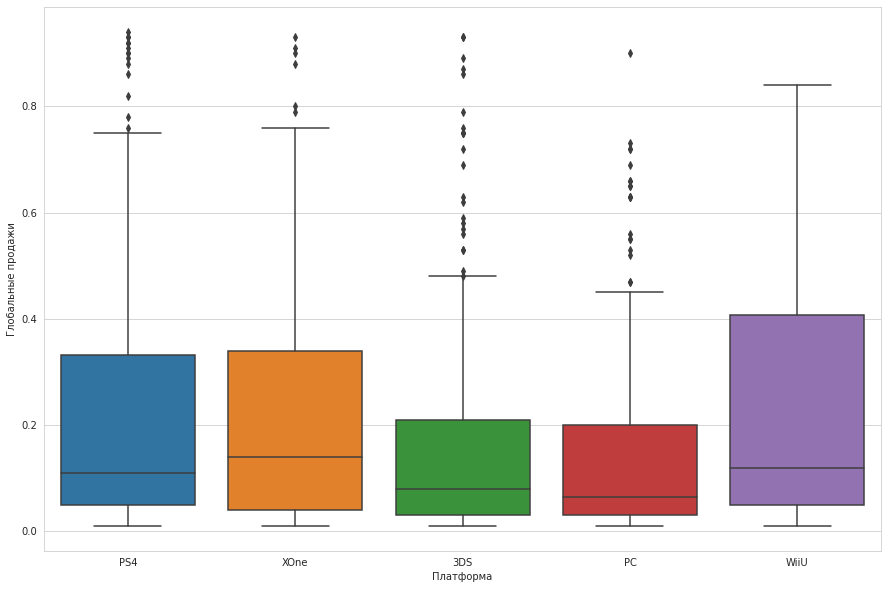

In [44]:
plt.figure(figsize=(15,10))
sns.boxplot(data=games_top_5_platforms, x='platform', y='total_sales')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи');

***Вывод:***
- медианные значения у топ-5 платформ смещены в среднем ближе к первому квартилю. Особенно это заметно по плафторме PC,
- нижний «ус» по  представленным платформам практически упирается в 0, минимальное значение. Всё, что лежит за верхним "усом", считается выбросом,
- значения, которые отсёк верхний «ус», — скорее редкие. Видно, насколько медиана  не стремится к длинному хвосту высоких значений.
- больше всего продаж у WiiU, на втором месте - XOne, тройку замыкает - PS4.
- платформа WiiU была выпущена в 2012 году и  на момент её выхода была одной из лучших среди домашних консолей.

***Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.*** Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. В качестве примера возьмем платформу WiiU

Для начала отфильтруем датафрейм по critic_score >= 0 для того, чтобы не вошли строки, заполненные ранее значениями -100 (строки без оценок)

In [45]:
games_top_5_platforms_filtered = games_top_5_platforms.query('critic_score>=0')

In [46]:
wiiu_platform = games_top_5_platforms_filtered[games_top_5_platforms_filtered['platform'] == 'WiiU']
display('Корреляция WiiU продажи и оценки критиков:', wiiu_platform['critic_score'].corr(wiiu_platform['total_sales']))
display('Корреляция WiiU продажи и оценки пользоваталей:', wiiu_platform['user_score'].corr(wiiu_platform['total_sales']))

'Корреляция WiiU продажи и оценки критиков:'

0.3830748805161393

'Корреляция WiiU продажи и оценки пользоваталей:'

0.20345935314514405

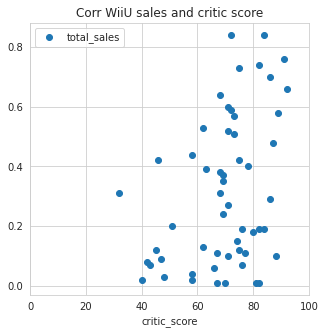

In [47]:
wiiu_platform.plot(x='critic_score', y='total_sales', grid=True, style='o', figsize=(5, 5), xlim=([0, 100]))
plt.title('Corr WiiU sales and critic score');

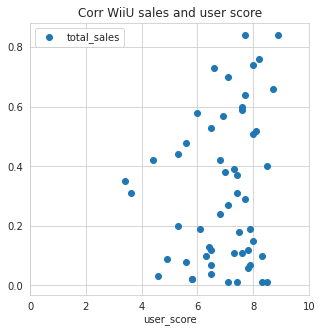

In [48]:
wiiu_platform.plot(x='user_score', y='total_sales', grid=True, style='o', figsize=(5, 5), xlim=([0, 10]))
plt.title('Corr WiiU sales and user score');

***Вывод по WiiU:***

 - Корреляция продаж и оценки критиков положительная: 0.38, указывающая на прямую несильную зависимость продаж игр платформы WiiU от оценок критиков.
 - Корреляция продаж и оценки пользователей положительная: 0.2, указывающая на наличие прямой зависимости продаж игр платформы WiiU от оценок пользоваталей. Так как коэффициент корреляции располагается ближе к 0, это свидетельствует о наличии прямой, но достаточно слабой зависимости. Это также мы можем видеть на диаграмме рассеяния

***Рассмотрим также корреляцию продаж игр и оценок по остальным платформам из Топ-5.*** Построим соответсвующие диаграммы рассеяния

In [49]:
xone_platform = games_top_5_platforms_filtered[games_top_5_platforms_filtered['platform'] == 'XOne']
display('Корреляция XOne продажи и оценки критиков:', xone_platform['critic_score'].corr(xone_platform['total_sales']))
display('Корреляция XOne продажи и оценки пользоваталей:', xone_platform['user_score'].corr(xone_platform['total_sales']))

'Корреляция XOne продажи и оценки критиков:'

0.31264077031871634

'Корреляция XOne продажи и оценки пользоваталей:'

-0.03415349956831617

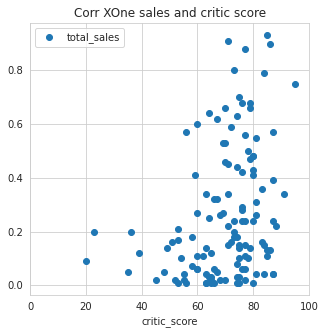

In [50]:
xone_platform.plot(x='critic_score', y='total_sales', grid=True, style='o', figsize=(5, 5), xlim=([0, 100]))
plt.title('Corr XOne sales and critic score');

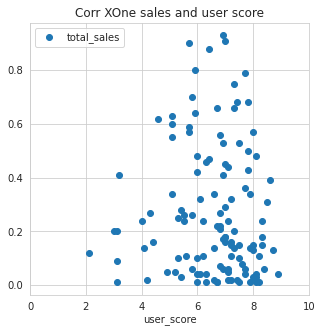

In [51]:
xone_platform.plot(x='user_score', y='total_sales', grid=True, style='o', figsize=(5, 5), xlim=([0, 10]))
plt.title('Corr XOne sales and user score');

***Вывод XOne:***
- Корреляция продаж и оценки критиков положительная: 0.31, указывающая на наличие прямой зависимости продаж игр платформы XOne от оценок критиков. Так как коэффициент корреляции располагается ближе к 0, это свидетельствует о наличии прямой, но достаточно слабой зависимости. Это также мы можем видеть на диаграмме рассеяния,
- Корреляция продаж и оценки пользователей отрицательная: - 0.03, указывающая на наличие обратной зависимости продаж игр платформы XOne от оценок критиков. Так как коэффициент корреляции располагается ближе к 0, это свидетельствует о наличии обратной, но очень слабой (практически отсутствующей) зависимости. Это также мы можем видеть на диаграмме рассеяния - большой разброс.

In [52]:
ps4_platform = games_top_5_platforms_filtered[games_top_5_platforms_filtered['platform'] == 'PS4']
display('Корреляция PS4 продажи и оценки критиков:', ps4_platform['critic_score'].corr(ps4_platform['total_sales']))
display('Корреляция PS4 продажи и оценки пользоваталей:', ps4_platform['user_score'].corr(ps4_platform['total_sales']))

'Корреляция PS4 продажи и оценки критиков:'

0.3058778676374949

'Корреляция PS4 продажи и оценки пользоваталей:'

0.010083635365436203

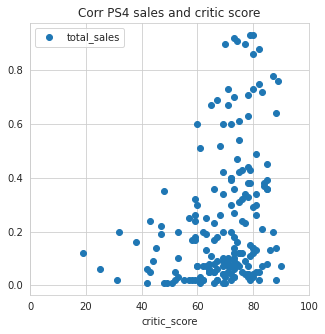

In [53]:
ps4_platform.plot(x='critic_score', y='total_sales', grid=True, style='o', figsize=(5, 5), xlim=([0, 100]))
plt.title('Corr PS4 sales and critic score');

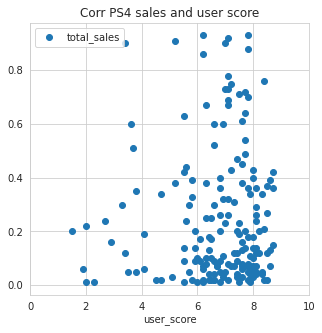

In [54]:
ps4_platform.plot(x='user_score', y='total_sales', grid=True, style='o', figsize=(5, 5), xlim=([0, 10]))
plt.title('Corr PS4 sales and user score');

***Вывод по PS4:***
- Корреляция продаж и оценки критиков положительная: 0.3, указывающая на наличие прямой зависимости продаж игр платформы PS4 от оценок критиков. Так как коэффициент корреляции располагается ближе к 0, это свидетельствует о наличии прямой, но очень слабой зависимости. Это также мы можем видеть на диаграмме рассеяния,
- Корреляция продаж и оценки пользователей положительная: 0.01, указывающая на наличие прямой зависимости продаж игр платформы PS4 от оценок критиков. Так как коэффициент корреляции располагается ближе к 0, это свидетельствует о наличии обратной, но очень слабой (практически отсутствубщей) зависимости. Это также мы можем видеть на диаграмме рассеяния - большой разброс.

In [55]:
platform_3ds = games_top_5_platforms_filtered[games_top_5_platforms_filtered['platform'] == '3DS']
display('Корреляция 3DS продажи и оценки критиков:', platform_3ds['critic_score'].corr(platform_3ds['total_sales']))
display('Корреляция 3DS продажи и оценки пользоваталей:', platform_3ds['user_score'].corr(platform_3ds['total_sales']))

'Корреляция 3DS продажи и оценки критиков:'

0.2976730456677239

'Корреляция 3DS продажи и оценки пользоваталей:'

0.10990918725785007

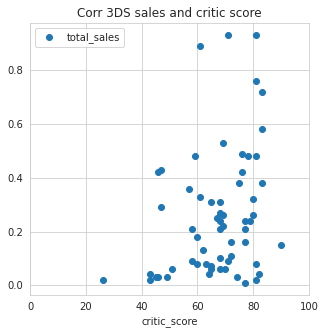

In [56]:
platform_3ds.plot(x='critic_score', y='total_sales', grid=True, style='o', figsize=(5, 5), xlim=([0, 100]))
plt.title('Corr 3DS sales and critic score');

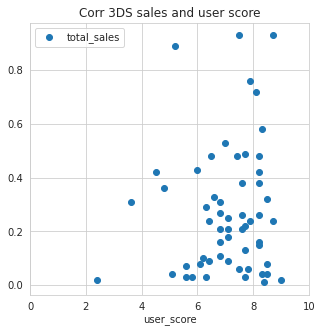

In [57]:
platform_3ds.plot(x='user_score', y='total_sales', grid=True, style='o', figsize=(5, 5), xlim=([0, 10]))
plt.title('Corr 3DS sales and user score');

***Вывод по 3DS:***
- Корреляция продаж и ценки критиков положительная: 0.3, указывающая на наличие прямой несильной зависимости продаж игр платформы 3DS от оценок критиков. 
- Корреляция продаж и оценки пользователей положительная: 0.11, указывающая на наличие очень слабой или практически отсутствующей обратной связи. Это также мы можем видеть на диаграмме рассеяния - большой разброс.

In [58]:
pc_platform = games_top_5_platforms_filtered[games_top_5_platforms_filtered['platform'] == 'PC']
display('Корреляция PC продажи и оценки критиков:', pc_platform['critic_score'].corr(pc_platform['total_sales']))
display('Корреляция PC продажи и оценки пользоваталей:', pc_platform['user_score'].corr(pc_platform['total_sales']))

'Корреляция PC продажи и оценки критиков:'

0.3168250300371519

'Корреляция PC продажи и оценки пользоваталей:'

-0.019217380273241318

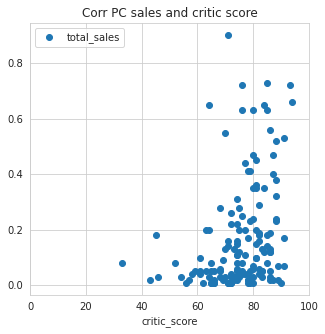

In [59]:
pc_platform.plot(x='critic_score', y='total_sales', grid=True, style='o', figsize=(5, 5), xlim=([0, 100]))
plt.title('Corr PC sales and critic score');

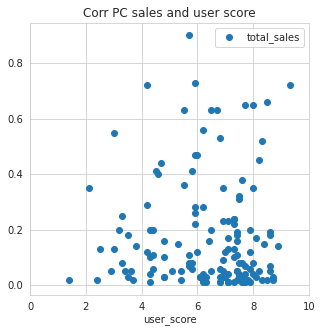

In [60]:
pc_platform.plot(x='user_score', y='total_sales', grid=True, style='o', figsize=(5, 5), xlim=([0, 10]))
plt.title('Corr PC sales and user score');

***Вывод по PC***:
- Корреляция продаж и оценки критиков положительная: 0.32, указывающая на наличие прямой несильной зависимости продаж игр платформы PC от оценок критиков.
- Корреляция продаж и оценки пользоваталей отрицательная: - 0.02, указывающая на наличие очень слабой или практически отсутствующей обратной связи. Это также мы можем видеть на диаграмме рассеяния - большой разброс.

***Общий вывод по корреляции по топ-5 плафтормам:***

Корреляционная зависимость между оценками пользователей,критиков и продажами есть, но слабо выраженная:
- Зависимость продаж от оценок пользователей практически близка к 0 за исключением платформы WiiU, корреляция по которой равна 0.2, что свидетельствует о наличии слабой прямой связи. По двум платформам корреляция близка к 0 с отрицательной стороны (обратная связь), по остальным трем - с положительной (прямая связь).
- Корреляция продаж от оценок критиков положительная и более выраженная (от 0.3 до 0.38), что говорит о наличии приямой связи, однако не слишком сильной.

***Посмотрим на общее распределение игр по жанрам.*** Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [61]:
genre_pivot = (
    data_actual_pure.pivot_table(index='genre', values='total_sales', aggfunc='median')
    .rename(columns={'total_sales':'median_total_sales'})
    .sort_values(by='median_total_sales', ascending=False).reset_index()
)
display(genre_pivot)

,genre,median_total_sales
0,Shooter,0.250
1,Sports,0.140
2,Platform,0.120
3,Role-Playing,0.100
4,Fighting,0.100
5,Action,0.090
6,Misc,0.080
7,Racing,0.080
8,Simulation,0.080
9,Strategy,0.075


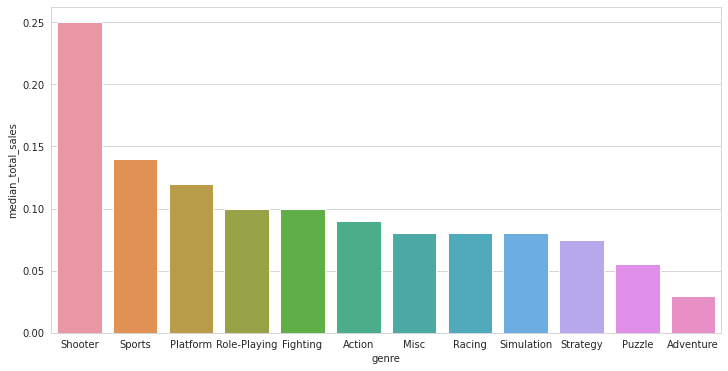

In [62]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_pivot['genre'],y=genre_pivot['median_total_sales']);

***Вывод:***

- топ-3 прибыльных жанров (в порядке убывания) - Shooter, Sports, Platform. Это вполне логично, так как игры данных жанров динамичные и захватывающие с точки зрения сюжетов,
- жанры с самыми низкими медианными продажами - Puzzle, Adventure,
- здесь следует учитывать, что разработка игр прибыльных жанров из топ-3 требует значительно бОльших финансовых вложений в разработку чем игр из жанра, например, Puzzle,
- жанр Adventure возможно пользуется низкой популярностью из-за того, что в играх данного жанра акцент на прохождении сложных заданий. 

***Вывод по исследовательскому анализу:***
- за временной период, для которого предоставлены данные, мы можем наблюдать три основных этапа развития комплютерных игр - рост с 1990 гг. до 2008 г., пик  - 2008-2009 гг., далее спад,
- топ-5 платформ с наибольшими суммарными продажами за весь период (1980 - 2016 гг.) - PS2, X360, PS3, Wii, DS,
- топ-5 платформ с наибольшими суммарными продажами за выбранный актуальный период (2013-2016 гг.) - WiiU, XOne, PS4, 3DS, PC,
- средняя продолжительность "жизни" платформ - 7-8 лет. На пик продаж платформы выходят  в среднем через 4-5 лет после запуска,
- у анализируемых платформ из топ-5 наблюдается приямая несильная взаимосвязь между продажами и оценками критиков. Оценки пользоваталей практически не играют значимой роли. Таким образом для пользоваталей игр мнение критиков весомее мнения других пользователей,
- самый популярный жанр игр за выбранный актуальный период (2013-2016 гг.) - Shooter. Самый невостребованный с точки зрения продаж  - жанр Adventure.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
* 		Самые популярные платформы (топ-5). Опишем различия в долях продаж.
* 		Самые популярные жанры (топ-5). Поясним разницу.
* 		Оценим влияние ли рейтинг ESRB на продажи в отдельном регионе

***Регион - NA (Северная Америка).*** Возьмем два временных отрезка: актуальный период - 2013-2016 гг. и только 2016 год.

,na_sales
platform,
XOne,25.59
PS4,23.27
X360,22.28
PS3,20.98
WiiU,11.07


,na_sales
genre,
Action,42.14
Sports,19.38
Shooter,16.98
Role-Playing,14.53
Misc,10.76


,na_sales
rating,
M,31.76
E10+,30.00
no rating,26.87
T,19.58
E,18.73


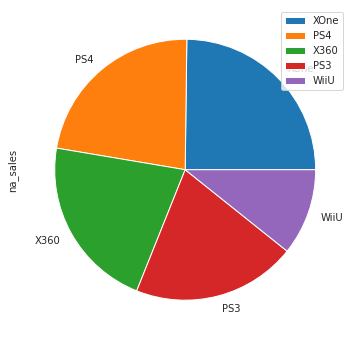

In [63]:
na_top5_platforms = (
    data_actual_pure.pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)
display(na_top5_platforms.head())
na_top5_genres = (
    data_actual_pure.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)
display(na_top5_genres.head())
na_rating = (
    data_actual_pure.pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)
display(na_rating)

na_top5_platforms.head().plot.pie(subplots=True, figsize=(11, 6));

,na_sales
platform,
PS4,7.01
XOne,6.04
PC,1.36
3DS,1.16
WiiU,1.04


,na_sales
genre,
Action,6.71
Shooter,3.54
Sports,2.01
Role-Playing,1.78
Adventure,0.95


,na_sales
rating,
M,4.76
T,4.06
no rating,4.03
E10+,3.31
E,2.02


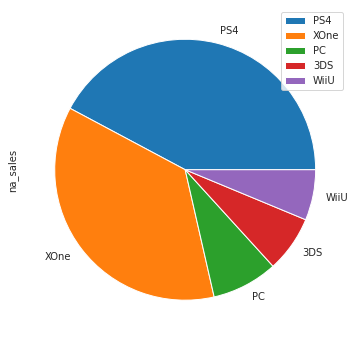

In [64]:
data_actual_pure_2016 = (data_actual_pure.query('year_of_release == 2016'))
na_top5_platforms_2016 = (
    data_actual_pure_2016.pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)
display(na_top5_platforms_2016.head())
na_top5_genres_2016 = (
    data_actual_pure_2016.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)
display(na_top5_genres_2016.head())
na_rating_2016 = (
    data_actual_pure_2016.pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)
display(na_rating_2016)
na_top5_platforms_2016.head().plot.pie(subplots=True, figsize=(11, 6));

***Вывод по Северной Америке:***
- самые популярные игровые платформы в Северной Америке за 2013-2016 гг.: PS4, XOne, PC, PS3, WiiU,,
- самые популярные игровые платформы в Северной Америке за 2016 год : PS4, XOne, PC, 3DS, WiiU,
- топ-5 жанров за 2013-2016 гг.- Action, Sports, Shooter, Role-Playing,  Misc,
- топ-5 жанров за 2016 год - Action, Shooter, Sports, Role-Playing, Adventure,
- по рейтингам видно, что больше всего продаж за 2013-2016 гг.у игр с рейтингом "Для взрослых, на втором месте игры с рейтингом "от 10 лет и выше" и на третьем месте игры с без рейтингы,
- за 2016 год больше всего продаж у игр с рейтингом "Для взрослых", на втором месте игры с рейтингом "Подросткам" и на третьем месте игры без рейтинга.

***Регион - EU (Европа).*** Возьмем два временных отрезка: актуальный период - 2013-2016 гг. и только 2016 год.

,eu_sales
platform,
PS4,27.25
PS3,19.29
PC,18.84
XOne,14.86
X360,13.39


,eu_sales
genre,
Action,42.18
Shooter,16.24
Sports,14.84
Role-Playing,10.35
Misc,7.08


,eu_sales
rating,
M,28.42
no rating,26.47
E10+,26.08
E,21.03
T,17.36


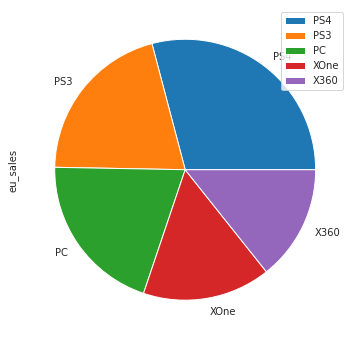

In [65]:
eu_top5_platforms = (
    data_actual_pure.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)
display(eu_top5_platforms.head())
eu_top5_genres = (
    data_actual_pure.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)
display(eu_top5_genres.head())
eu_rating = (
    data_actual_pure.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)
display(eu_rating)
eu_top5_platforms.head().plot.pie(subplots=True, figsize=(11, 6));

,eu_sales
platform,
PS4,9.78
XOne,3.96
PC,3.53
PS3,1.26
WiiU,0.92


,eu_sales
genre,
Action,6.71
Sports,3.69
Shooter,3.05
Role-Playing,1.79
Adventure,1.32


,eu_sales
rating,
E,4.71
M,4.70
T,4.60
no rating,3.98
E10+,3.55


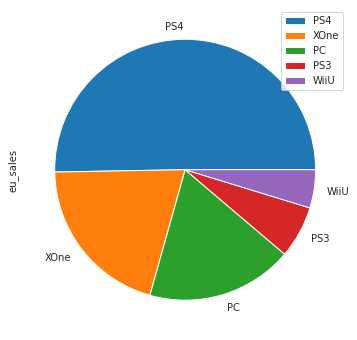

In [66]:
eu_top5_platforms_2016 = (
    data_actual_pure_2016.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)
display(eu_top5_platforms_2016.head())
eu_top5_genres_2016 = (
    data_actual_pure_2016.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)
display(eu_top5_genres_2016.head())
eu_rating_2016 = (
    data_actual_pure_2016.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)
display(eu_rating_2016)
eu_top5_platforms_2016.head().plot.pie(subplots=True, figsize=(11, 6));

***Вывод по Европе:***
- самые популярные игровые платформы в Европе за последние за 2013-2016 гг.: PS3, PS4,  XOnePC, X360,
- самые популярные игровые платформы в Европе за 2016 год : PS4, XOne, PC, PS3, WiiU,
- топ-5 жанров за за 2013-2016 гг. - Action, Shooter, Sports, Role-Playing, Misc,
- топ-5 жанров за 2016 год - Action, Sports, Shooter, Role-Playing, Adventure,
- по рейтингам видно, что больше всего продаж за 2013-2016 гг. у игр с рейтингом "Для взрослых", на втором месте игры без рейтинга и на третьем месте игры с рейтингом "От 10 и выше",
- за 2016 год больше всего продаж у игр с рейтингом "Для всех", на втором месте игры с рейтингом "Для взрослых" и на третьем месте игры с рейтингом "Для подростков".

***Регион - JP (Япония).*** Возьмем два временных отрезка: актуальный период - 2013-2016 гг. и только 2016 год.

,jp_sales
platform,
3DS,24.27
PSV,17.69
PS3,17.13
PS4,8.23
PSP,3.29


,jp_sales
genre,
Action,26.61
Role-Playing,20.77
Misc,6.46
Adventure,5.69
Sports,4.80


,jp_sales
rating,
no rating,45.69
T,15.40
M,5.76
E,4.31
E10+,2.81


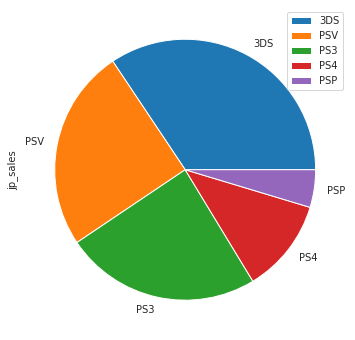

In [67]:
jp_top5_platforms = (
    data_actual_pure.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)
display(jp_top5_platforms.head())
jp_top5_genres = (
    data_actual_pure.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)
display(jp_top5_genres.head())
jp_rating = (
    data_actual_pure.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)
display(jp_rating)
jp_top5_platforms.head().plot.pie(subplots=True, figsize=(11, 6));

,jp_sales
platform,
3DS,4.44
PS4,4.12
PSV,3.56
PS3,1.30
WiiU,0.42


,jp_sales
genre,
Action,5.54
Role-Playing,3.97
Adventure,1.18
Misc,1.04
Sports,0.82


,jp_sales
rating,
no rating,10.63
T,1.71
E,0.97
E10+,0.28
M,0.26


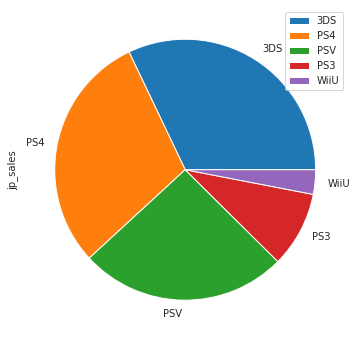

In [68]:
jp_top5_platforms_2016 = (
    data_actual_pure_2016.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)
display(jp_top5_platforms_2016.head())
jp_top5_genres_2016 = (
    data_actual_pure_2016.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)                    
display(jp_top5_genres_2016.head())
jp_rating_2016 = (
    data_actual_pure_2016.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)
display(jp_rating_2016)
jp_top5_platforms_2016.head().plot.pie(subplots=True, figsize=(11, 6));

***Вывод по Японии:***
- самые популярные игровые платформы в Японии за 2013-2016 гг.: 3DS, PSV, PS4, PS3, PSP,
- самые популярные игровые платформы в Японии за 2016 год : 3DS, PS4, PSV, PS3, WiiU,
- топ-5 жанров за 2013-2016 гг. - Action, Role-Playing, Misc, Adventure, Sports,
- топ-5 жанров за 2016 год - Action, Role-Playing, Adventure, Misc, Sports,
- по рейтингам видно, что больше всего продаж за 2013-2016 гг. у игр без рейтинга, на втором месте игры с рейтингом "Подросткам" и на третьем месте игры c рейтингом "Для взрослых". За 2016 год -  игры без рейтинга, на втором месте игры с рейтингом "Подросткам" и на третьем месте игры c рейтингом "Для всех".

***Общий вывод:***

Пользователи Европы и Северной Америки в основной массе предпочитают игры жанров Action, Shooting и Sports. Отсюда вытекает и главенство таких платформ как PS3 и PS4 для данных регионов. Ситуация с Японией иная. Юзерам из Японии ближе такие жанры Action и Role-Playing. Самой продаваемой платформой является 3DS японского производителя Nintendo.  Рейтинг ESRB влияет на европейских и американских пользователей. В Японии же превалируют игры без рейтинга.

<div class="alert alert-success">
<h2> Комментарий ревьюера 👍<a class="tocSkip"> </h2>

Тут все верно. После выбора более короткого актуального периода в принципе отпадет необходимость смотреть отдельно на 2016 год, но можно и оставить

## Проверка гипотез

###  Гипотеза 1 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

***Нулевая гипотеза:*** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. ***Альтернативная гипотеза:*** Средние пользовательские рейтинги платформ Xbox One и PC различаются. Если p-value меньше порогового значения alpha=0.05, нулевую гипотезу отвергаем. Проведем проверку гипотезы для актуального периода 2013 - 2016 гг.

In [69]:
xone = (
    data_actual_pure[(data_actual_pure['platform']=='XOne')
    & (data_actual_pure['year_of_release'] > 2012)]['user_score']
)
pc = (
    data_actual_pure[(data_actual_pure['platform']=='PC')
    & (data_actual_pure['year_of_release'] > 2012)]['user_score']
)

In [70]:
alpha = 0.05
results = st.ttest_ind(xone.dropna(), pc.dropna(), equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

p-значение: 0.21780418526885448
Не можем отвергнуть нулевую гипотезу


### Гипотеза 2 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

***Нулевая гипотеза:*** Средние пользовательские рейтинги жанров Action и Sports одинаковые. ***Альтернативная гипотеза:*** Средние пользовательские рейтинги жанров Action и Sports разные. Если p-value меньше порогового значения alpha=0.05, нулевую гипотезу отвергаем. Проведем проверку гипотезы для актуального периода 2013 - 2016 гг.

In [71]:
action = (
    data_actual_pure[(data_actual_pure['genre']=='Action') 
    & (data_actual_pure['year_of_release'] > 2012)]['user_score']
)
sports = (
    data_actual_pure[(data_actual_pure['genre']=='Sports') 
    & (data_actual_pure['year_of_release'] > 2012)]['user_score']
)

In [72]:
alpha = 0.05
results = st.ttest_ind(action.dropna(), sports.dropna(), equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

p-значение: 7.241290806998172e-14
Отвергаем нулевую гипотезу


***Вывод:***

***Гипотеза 1 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:***

При проведении статистического теста по актуальному периоду 2013 - 2016 гг., получилось, что мы не можем отвергнуть нелувую гипотезу о равенстве средних пользовательских оценок платформ Xbox One и PC.

***Гипотеза 2 - Средние пользовательские рейтинги жанров Action и Sports разные:***

При проведении статистического теста по актуальному периоду 2013-2016 гг. мы получили то, что средние пользовательские рейтинги жанров Action и Sports разнятся - нулевая гипотеза отвергнута.

Для иллюстрации результатов статистического теста получим средние пользовательские рейтинги для жанров Action и Sports для двух рассматриваемых периодов. Как мы видим рейтинги действительно разнятся

In [73]:
display('Средний пользовательский рейтинг Action 2013-2016: {:.1f}'.format(action.dropna().mean()))
display('Средний пользовательский рейтинг Sports 2013-2016: {:.1f}'.format(sports.dropna().mean()))

'Средний пользовательский рейтинг Action 2013-2016: 6.8'

'Средний пользовательский рейтинг Sports 2013-2016: 5.2'

## Общий вывод

<div style="border: solid green 2px; padding: 20px">


- В развитии компьютерных игр, исследуя период с 1980 по 2016 гг., мы можем наблюдать три основных этапа  - ощутимый рост с 1990 гг. до 2008 г., пик  - 2008-2009 гг., далее спад.
- Наибольшее количество игр было выпущено в 2008 и 2009 гг. - 1427 и 1426 игр соответственно. Для сравнения в 1990 году было выпущено всего 16 игр.
- Средний срок "жизни" платформы  - 7-8 лет. На пик продаж платформа в среднем выходит через 4-5 лет после релиза.
- Потенциально прибыльные платформы - PS4, 3DS, XOne, WiiU, PC. Но и по ним, равно как и по остальным, последние несколько лет мы можем наблюдать общий тренд - падение продаж.
- Самыми прибыльными жанрами игр является Shooter и Sports. Жанр с самыми низкими продажами - Adventure и Puzzle. В данном вопросе следует учитывать, что разработка игр такиого жанра как Shooter требует значительно бОльших финансовых вложений по сравнению с играми из жанра Puzzle. Жанры Shooter и Sports являются более динамичнымы и разнообразнымы, что также обуславливает их высокую популярность у пользоваталей.
- На динамику продаж компьютерных игр в большей степени напрямую влияет оценка критиков, чем пользователей.  Но и взаимосвязь первой с продажами не является сильной.
- Рейтинг организации ESRB оказывает влияние на продажи в таких регионах как Северная Америка и Европа. В Японии же превалируют в продажах игры без рейтинга.
- Портрет усредненного пользователя региона Северная Америка: юзер компьютерных игр на платформах PS4, XOne, PC, 3DS, WiiU в жанре Action, Shooter, Sports, Role-Playing, Adventure с рейтингами "Для взрослых", "Подросткам".
- Портрет усредненного пользователя региона Европа: юзер компьютерных игр на платформах PS4, XOne, PC, PS3, WiiU в жанре Action, Sports, Shooter с рейтингами "Для всех", "Для взрослых".
- Портрет усредненного пользователя Японии: юзер компьютерных игр без рейтинга на платформах 3DS, PS4, PSV, PS3, WiiU в жанре Action, Role-Playing, Adventure, Misc, Sports.
    

*Таким образом для прогноза продаж и рекламных кампаний на следующий год следует сфокусировать внимание в первую очередь на развитии игр на платформе PS4 в жанре Shooter с рейтингами "Для всех" и "Для взрослых". Также можно рассмотреть игры жанра Sports как потенциально прибыльные. Для анализа трендов и динамики рекомендуем рассматривать временной период 2013 - 2016 гг. Так мы имеем в скоупе и платформы, которые сейчас находятся на пике продаж, а также те, которые еще не завершили свой жизенный цикл, и новые платформы последнего года. В этом случае у нас складывается полная картина текущей ситуации в сфере компьютерных игр для построения корректных прогнозов.*
    
                                                 
</div>